In [1]:
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['seaborn-deep'])

# Question 1

In [2]:
!head -n2 rocket.csv

# Time(s),Position(m),Uncertainty(m)
0.000000,0.000000,7500.000000


In [3]:
time, position, position_uncertainty = np.loadtxt('rocket.csv', skiprows=1, delimiter=',', unpack=True)

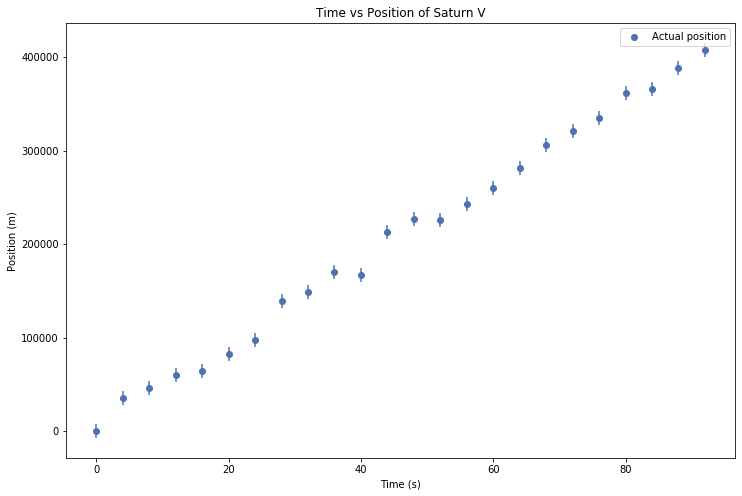

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(time, position, label='Actual position')
ax.errorbar(time, position, yerr=position_uncertainty, marker='', ls='')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Time vs Position of Saturn V')
ax.legend()
plt.savefig('rocket_plot1.png')

# Question 2

In [6]:
speeds = np.diff(position) / np.diff(time)
print(speeds.mean(), stats.sem(speeds))

4434.56260823913 629.3005178859614


# Question 3

# THERE IS AN ERROR IN THE FORMULA GIVEN IN THE INSTRUCTIONS. ALL THE S'S SHOULD BE D'S!!!    

In [7]:
def linreg(x, y):
    slope = ((x - x.mean()) * (y - y.mean())).sum() / np.square(x - x.mean()).sum()
    intercept = y.mean() - slope * x.mean()
    return slope, intercept

In [8]:
slope, intercept = linreg(time, position)
print(slope, intercept)

linregpos = slope * time + intercept

4357.412595548586 5640.244920890051


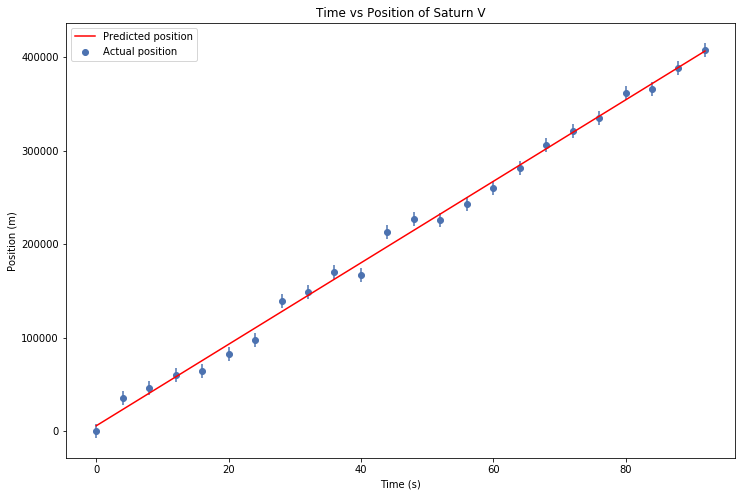

In [9]:
ax.plot(time, linregpos, c='r', label='Predicted position')
ax.legend()
fig

# Question 5

In [10]:
def rcs(pred, target, uncertainty, n_params):
    return np.square((pred - target) / uncertainty).sum() / (pred.size - n_params)

In [11]:
print(rcs(linregpos, position, position_uncertainty, 2))

1.325014463556978


# Question 6

In [12]:
def fit_func(indep_data, slope, intercept):
    return slope * indep_data + intercept

popt, pcov = curve_fit(f=fit_func, xdata=time, ydata=position, sigma=position_uncertainty, absolute_sigma=True, p0=(4300, 5600))

In [13]:
print(popt, np.sqrt(np.diag(pcov)))
print(rcs(fit_func(time, popt[0], popt[1]), position, position_uncertainty, 2))

[4357.4125952  5640.24494273] [  55.29074106 2968.58582183]
1.3250144635569776


Text(0, 0.5, 'Position (m)')

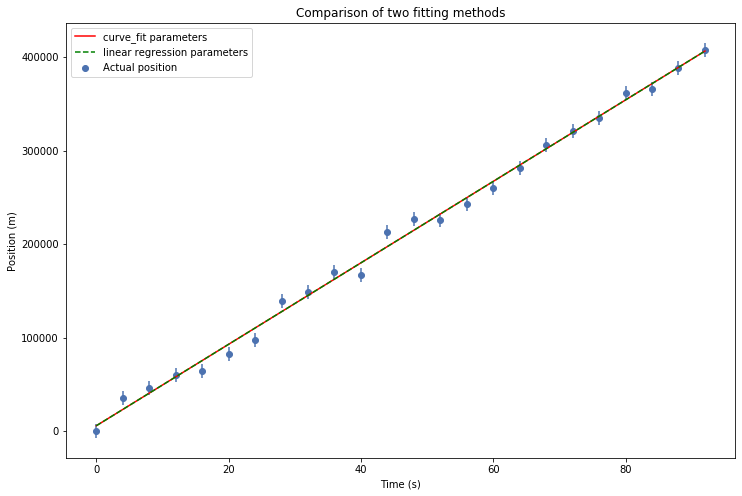

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(time, position, label='Actual position')
ax.errorbar(time, position, yerr=position_uncertainty, marker='', ls='')
ax.plot(time, fit_func(time, *popt), c='red', label='curve_fit parameters')
ax.plot(time, fit_func(time, *linreg(time, position)), c='green', linestyle='dashed', label='linear regression parameters')
ax.legend()
plt.title('Comparison of two fitting methods')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

# Question 7

In [16]:
!head -n5 feather.csv

# Time(s),Position(m),Uncertainty(m)
0.000000,1.926565,0.100000
0.100000,1.774297,0.100000
0.200000,1.804253,0.100000
0.300000,1.639400,0.100000


In [17]:
ftime, fposition, funcertainty = np.loadtxt('feather.csv', delimiter=',', skiprows=1, unpack=True)

In [18]:
def pred_feather_pos(time, initpos, initspeed, accel):
    return initpos + initspeed * time + 1/2 * accel * np.square(time)

In [19]:
popt2, pcov2 = curve_fit(f=pred_feather_pos, xdata=ftime, ydata=fposition, sigma=funcertainty, absolute_sigma=True, p0=(1.7, 0, -1/7*9.81))

In [20]:
print(popt2, np.sqrt(np.diag(pcov2)))

[ 1.78723393  0.21428325 -1.62483898] [0.06089164 0.14854806 0.15094446]


Text(0.5, 1.0, 'Fitting position of feather dropped on Moon')

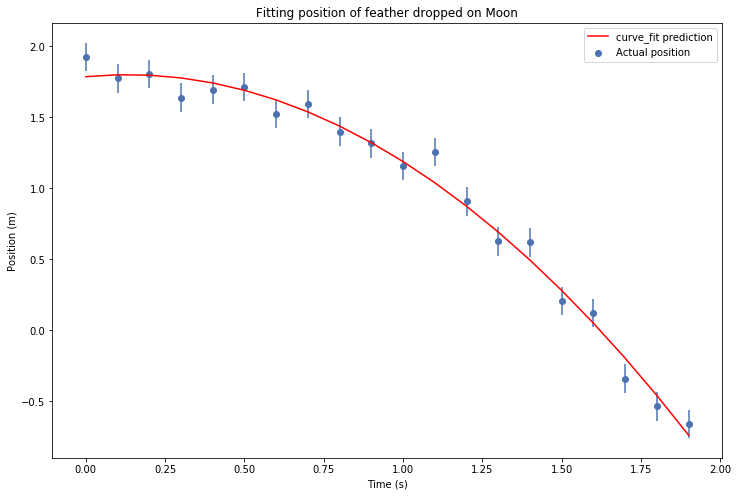

In [23]:
plt.figure(figsize=(12, 8))
plt.errorbar(ftime, fposition, funcertainty, ls='')
plt.scatter(ftime, fposition, label='Actual position')
plt.plot(ftime, pred_feather_pos(ftime, *popt2), c='r', label='curve_fit prediction')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Fitting position of feather dropped on Moon')
#plt.savefig('feather_plot1.png')